In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=10000)
fares = pd.read_csv(trip_fare_file, nrows=10000)

Merge the Trip and Fare data together 

In [3]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

In [4]:
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.022200,2.133800,719.343200,2.808752,-72.963232,40.211495,-72.940461,40.187411,11.826250,0.641150,0.499250,1.319314,0.167057,14.453021
std,0.230461,1.728582,506.055188,2.980911,8.599727,4.647672,8.691804,4.754211,8.992315,0.245067,0.019351,1.866007,0.966976,10.540082
min,1.000000,1.000000,0.000000,0.000000,-74.044479,0.000000,-74.177055,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,1.000000,1.000000,360.000000,1.100000,-73.992548,40.731696,-73.992090,40.729538,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000
50%,1.000000,1.000000,600.000000,1.840000,-73.982956,40.750097,-73.981930,40.749583,9.000000,0.500000,0.500000,1.000000,0.000000,11.500000
75%,1.000000,3.000000,960.000000,3.300000,-73.968735,40.765412,-73.963455,40.768214,14.000000,1.000000,0.500000,2.000000,0.000000,16.500000
max,5.000000,6.000000,7500.000000,29.610000,0.000000,41.453693,0.000000,40.993900,170.000000,1.000000,0.500000,30.000000,15.990000,180.000000


# What is the distribution of number of passengers per trip?

col_0             Frequency Probability
 passenger_count                       
1                                0.6094
2                                0.1295
3                                0.0467
4                                0.0234
5                                0.1143
6                                0.0767


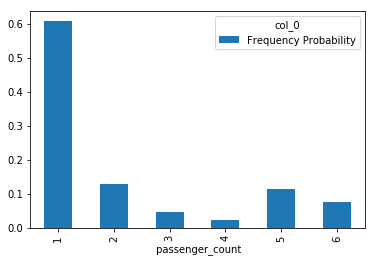

In [5]:
passengers = pd.crosstab(index=full_tripdata[" passenger_count"].astype("category"),columns="Frequency Probability",normalize='columns')
print passengers
passengers.plot.bar()

In [6]:
import numpy as np

In [7]:
passengers.columns

Index([u'Frequency Probability'], dtype='object', name=u'col_0')

In [12]:
passengers["logcount"] = -np.log(passengers[["Frequency Probability"]])

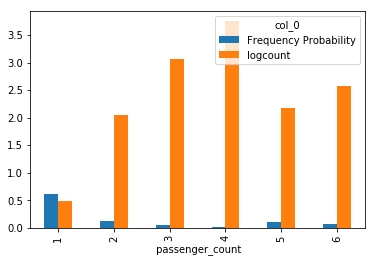

In [16]:
passengers.plot.bar()

# b. What is the distribution of payment_type?

col_0          Frequency Probability
 payment_type                       
CRD                           0.5679
CSH                           0.4315
UNK                           0.0006


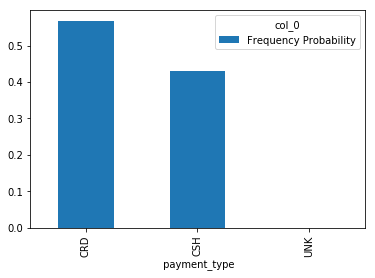

In [5]:
payment_types = pd.crosstab(index=full_tripdata[" payment_type"].astype("category"),columns="Frequency Probability",normalize='columns')
print payment_types
payment_types.plot.bar() 

# c. What is the distribution of fare amount?

In [6]:
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.022200,2.133800,719.343200,2.808752,-72.963232,40.211495,-72.940461,40.187411,11.826250,0.641150,0.499250,1.319314,0.167057,14.453021
std,0.230461,1.728582,506.055188,2.980911,8.599727,4.647672,8.691804,4.754211,8.992315,0.245067,0.019351,1.866007,0.966976,10.540082
min,1.000000,1.000000,0.000000,0.000000,-74.044479,0.000000,-74.177055,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,1.000000,1.000000,360.000000,1.100000,-73.992548,40.731696,-73.992090,40.729538,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000
50%,1.000000,1.000000,600.000000,1.840000,-73.982956,40.750097,-73.981930,40.749583,9.000000,0.500000,0.500000,1.000000,0.000000,11.500000
75%,1.000000,3.000000,960.000000,3.300000,-73.968735,40.765412,-73.963455,40.768214,14.000000,1.000000,0.500000,2.000000,0.000000,16.500000
max,5.000000,6.000000,7500.000000,29.610000,0.000000,41.453693,0.000000,40.993900,170.000000,1.000000,0.500000,30.000000,15.990000,180.000000


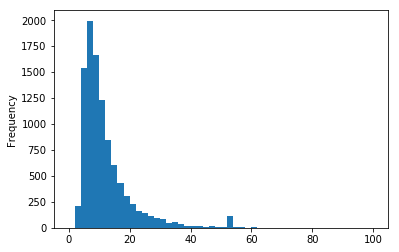

In [7]:
fare_amount = full_tripdata.iloc[:,15]
fare_amount.plot.hist(bins=50,range=(0,100))

# d. What is the distribution of tip amount?

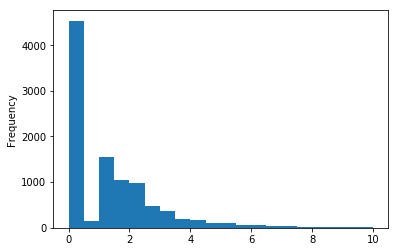

In [8]:
tips_amount = full_tripdata.iloc[:,18]
tips_amount.plot.hist(bins=20,range=(0,10))


count    10000.000000
mean         0.112817
std          0.129781
min          0.000000
25%          0.000000
50%          0.108221
75%          0.212500
max          4.800000
dtype: float64

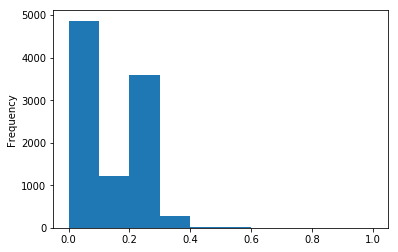

In [9]:
generosity = tips_amount /fare_amount 
generosity.plot.hist(bins=10,range=(0,1))
generosity.describe()

# e. What is the distribution of total amount?

count    10000.000000
mean        14.453021
std         10.540082
min          3.500000
25%          8.300000
50%         11.500000
75%         16.500000
max        180.000000
Name:  total_amount, dtype: float64

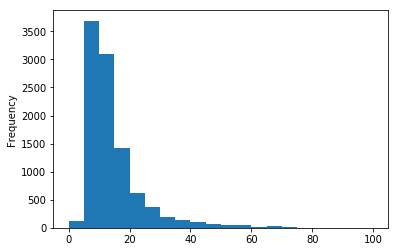

In [10]:
total_amounts = full_tripdata.iloc[:,20]
total_amounts.plot.hist(bins=20,range=(0,100))
total_amounts.describe()

# What are top 5 busiest hours of the day?

In [18]:
pickupTime = pd.DataFrame(full_tripdata.iloc[:,5])
pickupTime[" pickup_datetime"] = pd.to_datetime(pickupTime[" pickup_datetime"])
pickupTime.index = pickupTime[" pickup_datetime"]


frequency = pickupTime.groupby(pickupTime.index.hour).count()
print frequency

frequency.sort_values(by=[" pickup_datetime"],ascending=False).head(5).index


                   pickup_datetime
 pickup_datetime                  
0                              807
1                             1069
2                              154
3                                4
4                                3
5                                4
6                                7
7                               13
8                                5
9                                1
11                               2
12                               5
13                               4
14                              12
15                               5
16                              15
17                             801
18                            1269
19                             991
20                            1309
21                            1421
22                            1360
23                             739


Int64Index([21, 22, 20, 18, 1], dtype='int64', name=u' pickup_datetime')

# What are the top 10 busiest locations of the city?

In [12]:
#join the pickup and dropoff locations together
pickupLoc = pd.DataFrame(full_tripdata.iloc[:,10:12])
pickupLoc = pickupLoc.rename(columns={' pickup_longitude':'longtitude', ' pickup_latitude':'latitude'})
dropoffLoc = pd.DataFrame(full_tripdata.iloc[:,12:14])
dropoffLoc = pickupLoc.rename(columns={' dropoff_longitude':'longtitude', ' dropoff_latitude':'latitude'})

loc = pd.concat([pickupLoc,dropoffLoc],axis=0)


In [13]:
loc.count()

longtitude    20000
latitude      20000
dtype: int64

In [14]:
import geopandas as gpd
nyc = gpd.read_file('data/NYC Zoning.geojson')

nyc.count()

OBJECTID         2000
ZONEDIST         2000
Shape__Area      2000
Shape__Length    2000
geometry         2000
dtype: int64

In [15]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(loc.longtitude, loc.latitude)]


In [16]:
#loc = loc.drop(['longtitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
gloc = GeoDataFrame(loc, crs=crs, geometry=geometry)

In [17]:
locs_in_NYC = gpd.sjoin(gloc,nyc, how="left", op="intersects")
locs_in_NYC.head()
locs_in_NYC.describe()

,longtitude,latitude,index_right,OBJECTID,Shape__Area,Shape__Length
count,20000.000000,20000.000000,2658.000000,2658.000000,2.658000e+03,2658.000000
mean,-72.963232,40.211495,1597.519187,1598.519187,1.672208e-05,0.028004
std,8.599512,4.647556,620.916350,620.916350,3.931157e-05,0.028767
min,-74.044479,0.000000,7.000000,8.000000,8.042525e-08,0.001852
25%,-73.992548,40.731696,1118.000000,1119.000000,5.787313e-06,0.013381
50%,-73.982956,40.750097,1932.000000,1933.000000,9.464143e-06,0.020551
75%,-73.968735,40.765412,1980.000000,1981.000000,1.996469e-05,0.035539
max,0.000000,41.453693,1998.000000,1999.000000,1.217453e-03,0.610350


In [18]:
locs_in_NYC.count()

longtitude       20000
latitude         20000
geometry         20000
index_right       2658
OBJECTID          2658
ZONEDIST          2658
Shape__Area       2658
Shape__Length     2658
dtype: int64

In [19]:
locs_frequency = locs_in_NYC.groupby(by=['ZONEDIST']).count()
locs_frequency.sort_values(by=['geometry'],ascending=False).head(10).index

Index([u'C6-1', u'M1-6', u'R6B', u'R6', u'M1-5A', u'R6A', u'C2-8A', u'R8B',
       u'C1-9A', u'C6-2A'],
      dtype='object', name=u'ZONEDIST')

# h. Which trip has the highest standard deviation of travel time?

This question is to find out , for trips sharing the same pickup and dropoff locations, which group has the highest standard deviation of travel time

In [20]:
#remove unncessary columns from locs_in_NYC dataframe
locs_in_NYC = locs_in_NYC.drop(columns=['geometry','index_right','OBJECTID','Shape__Area','Shape__Length'])

In [21]:
# Prepare trip data, convert pickup locations to distrct
full_tripdata = pd.merge(full_tripdata,locs_in_NYC,how='left',left_on=[' pickup_longitude',' pickup_latitude'],right_on=['longtitude','latitude'])

In [22]:
full_tripdata.count()

medallion              54196
 hack_license          54196
 vendor_id             54196
 rate_code             54196
 store_and_fwd_flag     1624
 pickup_datetime       54196
 dropoff_datetime      54196
 passenger_count       54196
 trip_time_in_secs     54196
 trip_distance         54196
 pickup_longitude      54196
 pickup_latitude       54196
 dropoff_longitude     54196
 dropoff_latitude      54196
 payment_type          54196
 fare_amount           54196
 surcharge             54196
 mta_tax               54196
 tip_amount            54196
 tolls_amount          54196
 total_amount          54196
longtitude             54196
latitude               54196
ZONEDIST                2674
dtype: int64

In [23]:
#Rename colummn
full_tripdata = full_tripdata.rename(columns={'ZONEDIST':'PickupDIST'})
full_tripdata = full_tripdata.drop_duplicates()
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,longtitude,latitude
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.022200,2.133800,719.343200,2.808752,-72.963232,40.211495,-72.940461,40.187411,11.826250,0.641150,0.499250,1.319314,0.167057,14.453021,-72.963232,40.211495
std,0.230461,1.728582,506.055188,2.980911,8.599727,4.647672,8.691804,4.754211,8.992315,0.245067,0.019351,1.866007,0.966976,10.540082,8.599727,4.647672
min,1.000000,1.000000,0.000000,0.000000,-74.044479,0.000000,-74.177055,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.500000,-74.044479,0.000000
25%,1.000000,1.000000,360.000000,1.100000,-73.992548,40.731696,-73.992090,40.729538,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000,-73.992548,40.731696
50%,1.000000,1.000000,600.000000,1.840000,-73.982956,40.750097,-73.981930,40.749583,9.000000,0.500000,0.500000,1.000000,0.000000,11.500000,-73.982956,40.750097
75%,1.000000,3.000000,960.000000,3.300000,-73.968735,40.765412,-73.963455,40.768214,14.000000,1.000000,0.500000,2.000000,0.000000,16.500000,-73.968735,40.765412
max,5.000000,6.000000,7500.000000,29.610000,0.000000,41.453693,0.000000,40.993900,170.000000,1.000000,0.500000,30.000000,15.990000,180.000000,0.000000,41.453693


In [24]:
full_tripdata.count()

medallion              10000
 hack_license          10000
 vendor_id             10000
 rate_code             10000
 store_and_fwd_flag      162
 pickup_datetime       10000
 dropoff_datetime      10000
 passenger_count       10000
 trip_time_in_secs     10000
 trip_distance         10000
 pickup_longitude      10000
 pickup_latitude       10000
 dropoff_longitude     10000
 dropoff_latitude      10000
 payment_type          10000
 fare_amount           10000
 surcharge             10000
 mta_tax               10000
 tip_amount            10000
 tolls_amount          10000
 total_amount          10000
longtitude             10000
latitude               10000
PickupDIST              1329
dtype: int64

In [25]:
#Prepare trip data, convert dropoff locations to distrct
full_tripdata = pd.merge(full_tripdata,locs_in_NYC,how='left',left_on=[' dropoff_longitude',' dropoff_latitude'],right_on=['longtitude','latitude'])

In [26]:
#Rename colummn
full_tripdata = full_tripdata.rename(columns={'ZONEDIST':'DropoffDIST'})
full_tripdata = full_tripdata.drop_duplicates()
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,longtitude_x,latitude_x,longtitude_y,latitude_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,241.000000,241.000000
mean,1.022200,2.133800,719.343200,2.808752,-72.963232,40.211495,-72.940461,40.187411,11.826250,0.641150,0.499250,1.319314,0.167057,14.453021,-72.963232,40.211495,-31.923101,17.585766
std,0.230461,1.728582,506.055188,2.980911,8.599727,4.647672,8.691804,4.754211,8.992315,0.245067,0.019351,1.866007,0.966976,10.540082,8.599727,4.647672,36.715691,20.225911
min,1.000000,1.000000,0.000000,0.000000,-74.044479,0.000000,-74.177055,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.500000,-74.044479,0.000000,-74.044479,0.000000
25%,1.000000,1.000000,360.000000,1.100000,-73.992548,40.731696,-73.992090,40.729538,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000,-73.992548,40.731696,-73.980774,0.000000
50%,1.000000,1.000000,600.000000,1.840000,-73.982956,40.750097,-73.981930,40.749583,9.000000,0.500000,0.500000,1.000000,0.000000,11.500000,-73.982956,40.750097,0.000000,0.000000
75%,1.000000,3.000000,960.000000,3.300000,-73.968735,40.765412,-73.963455,40.768214,14.000000,1.000000,0.500000,2.000000,0.000000,16.500000,-73.968735,40.765412,0.000000,40.747719
max,5.000000,6.000000,7500.000000,29.610000,0.000000,41.453693,0.000000,40.993900,170.000000,1.000000,0.500000,30.000000,15.990000,180.000000,0.000000,41.453693,0.000000,40.993900


In [27]:
#caculate the duration for each trip

#trip_duration= full_tripdata.iloc[:,0:7] 
full_tripdata[" pickup_datetime"] = pd.to_datetime(full_tripdata[" pickup_datetime"])
full_tripdata[" dropoff_datetime"] = pd.to_datetime(full_tripdata[" dropoff_datetime"])

full_tripdata["duration"] = (full_tripdata[' dropoff_datetime']- full_tripdata[' pickup_datetime']).astype('timedelta64[m]') + 0.001
#trip_duration["duration"] = trip_duration.apply(lambda x: if not np.isnan(x['mangoes price']) else x['diff'], axis=1)

#trip_duration["duration"].plot.hist(bins=50)
#trip_duration["duration"].plot.kde()

#trip_duration["duration"].describe()
#trip_duration["STD"] = pd.rolling_std(trip_duration["duration"])

#trip_duration.head()

In [33]:
# group the trips with same pickup and dropoff locations

#print full_tripdata.describe()
print full_tripdata.count()
print full_tripdata
trip_duration = full_tripdata.groupby(['PickupDIST','DropoffDIST']).count()
trip_duration

medallion              10000
 hack_license          10000
 vendor_id             10000
 rate_code             10000
 store_and_fwd_flag      162
 pickup_datetime       10000
 dropoff_datetime      10000
 passenger_count       10000
 trip_time_in_secs     10000
 trip_distance         10000
 pickup_longitude      10000
 pickup_latitude       10000
 dropoff_longitude     10000
 dropoff_latitude      10000
 payment_type          10000
 fare_amount           10000
 surcharge             10000
 mta_tax               10000
 tip_amount            10000
 tolls_amount          10000
 total_amount          10000
longtitude_x           10000
latitude_x             10000
PickupDIST              1329
longtitude_y             241
latitude_y               241
DropoffDIST               15
duration               10000
dtype: int64
                              medallion                      hack_license  \
0      91F6EB84975BBC867E32CB113C7C2CD5  AD8751110E6292079EB10EB9481FE1A6   
1      EC34CD1B3797DF

,,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,longtitude_x,latitude_x,longtitude_y,latitude_y,duration
PickupDIST,DropoffDIST,,,,,,,,,,,,,,,,,,,,,
C1-9A,C1-9A,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C5-2A,C5-2,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C6-1,C6-1,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
C6-4.5,C6-4.5,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C8-4,C8-4,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
M1-5A,M1-5A,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
M1-6,M1-6,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
R10,R10,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
R6,R6,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [29]:
full_tripdata.loc[(full_tripdata['PickupDIST'] == 'C1-9A') & (full_tripdata['DropoffDIST'] == 'C1-9A')]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,tip_amount,tolls_amount,total_amount,longtitude_x,latitude_x,PickupDIST,longtitude_y,latitude_y,DropoffDIST,duration
11727,1066295CD099537C913DA66A2DC41F29,D0B70C448200CBA0F2342CC46AF5FA77,VTS,1,NaN,2013-04-12 17:25:00,2013-04-12 17:53:00,1,1680,4.02,...,0.0,0.0,22.0,-73.987236,40.733421,C1-9A,-73.987236,40.733421,C1-9A,28.001


count    11.000000
mean      0.189040
std       0.323769
min       0.000000
25%       0.000000
50%       0.000000
75%       0.346574
max       0.693147
Name: logduration, dtype: float64

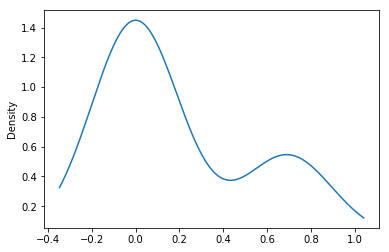

In [30]:
#the above caculated trip duration are not exactly followoing the normal distribution,
#so, I applyed the natural logarithm to transfrom the data to normal distribution 
# https://datascience.stackexchange.com/questions/14216/transform-a-skewed-distribution-into-a-gaussian-distribution


#import until
import numpy as np

trip_duration["logduration"] = np.log(trip_duration['duration'])

#trip_duration["logduration"].plot.hist(bins=50)
trip_duration["logduration"].plot.kde()


trip_duration["logduration"].describe()

In [31]:
# the highest stardard deviation trip are those data away from the mean by 3 STD
# http://libweb.surrey.ac.uk/library/skills/Number%20Skills%20Leicester/page_17.htm
trip_duration["logduration"].describe()
mean = trip_duration["logduration"].mean()
std = trip_duration["logduration"].std()

lowerbound = mean - 3 * std
upperbound = mean + 3 * std

#print lowerbound,upperbound

trip_duration.describe()

out3STDTrips = trip_duration.copy()
out3STDTrips = out3STDTrips.loc[(out3STDTrips['logduration'] < lowerbound) | (out3STDTrips['logduration'] > upperbound)]

print out3STDTrips.head()
out3STDTrips.describe()


Empty DataFrame
Columns: [medallion,  hack_license,  vendor_id,  rate_code,  store_and_fwd_flag,  pickup_datetime,  dropoff_datetime,  passenger_count,  trip_time_in_secs,  trip_distance,  pickup_longitude,  pickup_latitude,  dropoff_longitude,  dropoff_latitude,  payment_type,  fare_amount,  surcharge,  mta_tax,  tip_amount,  tolls_amount,  total_amount, longtitude_x, latitude_x, longtitude_y, latitude_y, duration, logduration]
Index: []

[0 rows x 27 columns]


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,mta_tax,tip_amount,tolls_amount,total_amount,longtitude_x,latitude_x,longtitude_y,latitude_y,duration,logduration
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# i. Which trip has most consistent fares? 

Define this question as , which trips , from same district to the same another/same district, with the smallest standa deviation 

In [32]:
import geojsonio
geojsonio.display(locs_in_NYC.head(1))

ValueError: Unknown type at index 0

In [ ]:
pickupLocations = full_tripdata.iloc[]

In [ ]:
from scipy.stats import norm
print norm.cdf(numberofpassanagers,mean,std)

In [ ]:
numberofpassanagers.plot.density()

In [ ]:
payment_types = fares.iloc[:,4]

payment_types.hist()

In [ ]:
payment_types.sum()

In [ ]:
print payment_types